# Training the agent
In this notebook we train the agent using a deep Q network

## 1. setup

In [3]:
from unityagents import UnityEnvironment
import numpy as np

import torch
from collections import deque
import matplotlib.pyplot as plt

from agent import Agent

In [ ]:
# Enviroment path (change this to your Banana.exe path)
PATH = "Banana_Windows_x86_64/Banana.exe"

In [4]:
#Create enviroment
env = UnityEnvironment(file_name=PATH, no_graphics = True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [8]:
## 2. Training the agent

Episode 100	Average Score: 1.33
Episode 200	Average Score: 4.73
Episode 300	Average Score: 7.71
Episode 400	Average Score: 10.42
Episode 500	Average Score: 11.82
Episode 600	Average Score: 14.15
Episode 700	Average Score: 13.93
Episode 800	Average Score: 14.84
Episode 900	Average Score: 15.20
Episode 1000	Average Score: 15.10
Episode 1100	Average Score: 15.21
Episode 1200	Average Score: 15.35
Episode 1300	Average Score: 16.36
Episode 1400	Average Score: 16.61
Episode 1500	Average Score: 16.27
Episode 1600	Average Score: 15.56
Episode 1700	Average Score: 16.29
Episode 1800	Average Score: 15.30
Episode 1900	Average Score: 16.02
Episode 2000	Average Score: 14.62


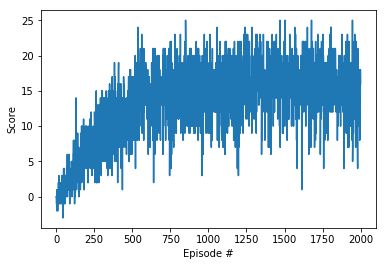

In [9]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            #Takinga an action
            action = agent.act(state, eps)
            
            #Getting state info
            env_info = env.step(int(action))[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            #next_state, reward, done, _ = env.step(action)[brain_name]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#Save the model
torch.save(agent.qnetwork_target.state_dict(), "model1.pt")

## 3. evaluating the model
here we take the moving average to see the performance over time

In [10]:
#moving average over the plot
N = 100
cumsum, moving_aves = [0], []

for i, x in enumerate(scores, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)

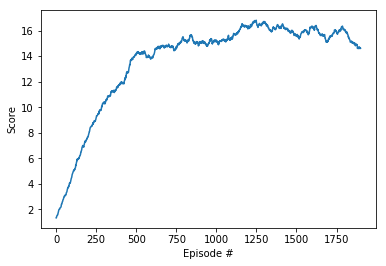

In [11]:
# plot moving average over the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(moving_aves)), moving_aves)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()